# RAINFALL PREDICTION

# Importing the libraries

In [1]:
#importing librarires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Read the data

In [2]:
data=pd.read_csv("C:\\Users\\Dell\\Downloads\\rainfall in india.csv")

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1971,102.7,27.2,20.0,65.4,279.0,639.9,685.3,121.3,380.9,509.0,229.6,454.8,3295.1
1,ANDAMAN & NICOBAR ISLANDS,1972,103.7,28.2,21.0,66.4,280.0,640.9,686.3,122.3,381.9,510.0,230.6,455.8,3296.1
2,ANDAMAN & NICOBAR ISLANDS,1973,NaN,29.2,22.0,67.4,281.0,641.9,687.3,123.3,382.9,511.0,231.6,456.8,3297.1
3,ANDAMAN & NICOBAR ISLANDS,1974,105.7,30.2,23.0,68.4,282.0,642.9,688.3,124.3,383.9,512.0,232.6,457.8,3298.1
4,ANDAMAN & NICOBAR ISLANDS,1975,106.7,31.2,24.0,69.4,283.0,643.9,689.3,125.3,384.9,513.0,233.6,458.8,3299.1


# Data Exploration and Pre-Processing

In [4]:
data.shape

(1617, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  1617 non-null   object 
 1   YEAR         1617 non-null   int64  
 2   JAN          1616 non-null   float64
 3   FEB          1616 non-null   object 
 4   MAR          1615 non-null   float64
 5   APR          1613 non-null   float64
 6   MAY          1617 non-null   float64
 7   JUN          1612 non-null   float64
 8   JUL          1616 non-null   float64
 9   AUG          1615 non-null   float64
 10  SEP          1615 non-null   float64
 11  OCT          1615 non-null   float64
 12  NOV          1616 non-null   float64
 13  DEC          1614 non-null   float64
 14  ANNUAL       1617 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 189.6+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14208\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


YEAR      1992.961039
JAN         57.696720
MAR         82.881981
APR        104.634532
MAY        117.170686
JUN        275.068362
JUL        372.274257
AUG        273.545820
SEP        190.164520
OCT        141.280124
NOV         85.984158
DEC         59.167782
ANNUAL    1353.035807
dtype: float64

# Data cleaning

In [8]:
# Data cleaning
data.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            1
FEB            1
MAR            2
APR            4
MAY            0
JUN            5
JUL            1
AUG            2
SEP            2
OCT            2
NOV            1
DEC            3
ANNUAL         0
dtype: int64

In [9]:
(data.isna().sum()/data.shape[0])*100

SUBDIVISION    0.000000
YEAR           0.000000
JAN            0.061843
FEB            0.061843
MAR            0.123686
APR            0.247372
MAY            0.000000
JUN            0.309215
JUL            0.061843
AUG            0.123686
SEP            0.123686
OCT            0.123686
NOV            0.061843
DEC            0.185529
ANNUAL         0.000000
dtype: float64

In [10]:
data.dropna(axis=0,inplace=True)

In [11]:
data.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(1594, 15)

In [14]:
# Data preprocessing
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB             object
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
dtype: object

In [15]:
data.FEB.unique()

array(['27.2', '28.2', '30.2', '31.2', '32.2', '33.2', '34.2', '35.2',
       '37.2', '38.2', '39.2', '40.2', '41.2', '?', '43.2', '44.2',
       '45.2', '46.2', '47.2', '48.2', '49.2', '51.2', '52.2', '53.2',
       '54.2', '55.2', '56.2', '57.2', '58.2', '59.2', '61.2', '63.2',
       '64.2', '65.2', '66.2', '67.2', '68.2', '69.2', '70.2', '85.3',
       '86.3', '87.3', '88.3', '89.3', '90.3', '91.3', '92.3', '93.3',
       '94.3', '95.3', '96.3', '97.3', '98.3', '101.3', '102.3', '103.3',
       '104.3', '105.3', '106.3', '107.3', '108.3', '109.3', '110.3',
       '111.3', '112.3', '113.3', '114.3', '115.3', '116.3', '117.3',
       '118.3', '119.3', '120.3', '121.3', '122.3', '123.3', '124.3',
       '125.3', '126.3', '23.3', '24.3', '25.3', '26.3', '27.3', '28.3',
       '29.3', '30.3', '31.3', '32.3', '33.3', '34.3', '35.3', '36.3',
       '37.3', '38.3', '39.3', '40.3', '41.3', '42.3', '43.3', '44.3',
       '45.3', '46.3', '47.3', '48.3', '49.3', '50.3', '51.3', '52.3',
       

In [16]:
data.loc[data['FEB']=='?']

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
15,ANDAMAN & NICOBAR ISLANDS,1986,117.7,?,35.0,80.4,294.0,654.9,700.3,136.3,395.9,524.0,244.6,469.8,3310.1
60,ARUNACHAL PRADESH,1986,66.8,?,344.9,476.0,379.5,792.8,589.7,313.5,418.7,136.8,81.2,74.1,3389.2
878,EAST MADHYA PRADESH,1997,65.3,?,90.5,62.5,55.9,184.5,331.8,428.4,267.6,81.9,46.0,46.0,1221.6
1015,KONKAN & GOA,1999,48.0,?,50.5,57.8,70.7,778.4,1162.7,555.6,177.0,344.3,84.3,48.0,2897.4
1398,COASTAL KARNATAKA,1977,26.0,?,26.9,81.4,96.7,966.2,1109.4,467.1,294.9,213.1,102.2,26.4,3150.3


In [17]:
data.describe()

,YEAR,JAN,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
count,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000
mean,1992.893350,57.479423,82.878984,104.150816,116.212798,272.878419,369.692158,274.153325,188.896612,139.681870,84.726725,57.806650,1339.921832
std,12.962495,31.043380,54.805513,96.842262,85.794783,254.886548,253.294493,136.673289,97.545566,106.026548,55.320047,68.515881,906.109382
min,1971.000000,20.000000,20.000000,20.300000,21.400000,25.100000,53.600000,63.700000,20.800000,20.200000,20.000000,20.000000,199.800000
25%,1982.000000,37.525000,51.500000,50.600000,57.100000,99.850000,200.400000,157.325000,119.525000,60.750000,52.400000,34.000000,756.525000
50%,1993.000000,51.200000,71.200000,70.100000,86.300000,171.950000,298.150000,239.500000,188.750000,118.350000,69.800000,47.000000,1018.500000
75%,2004.000000,63.900000,97.600000,111.700000,135.550000,237.300000,410.600000,377.275000,239.175000,173.675000,95.200000,59.100000,1461.350000
max,2015.000000,176.300000,370.900000,502.000000,405.500000,1004.200000,1178.700000,571.600000,444.700000,552.000000,292.600000,497.800000,3415.200000


In [18]:
data.FEB.replace('?',np.nan,inplace=True)

In [19]:
data.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            5
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
dtype: int64

In [20]:
data.FEB=data.FEB.astype(float)

In [21]:
data.FEB.describe()

count    1589.000000
mean       52.172121
std        25.973231
min        20.000000
25%        34.400000
50%        47.800000
75%        60.200000
max       163.300000
Name: FEB, dtype: float64

In [22]:
data.FEB.fillna(data.FEB.median(),inplace=True)

In [23]:
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
dtype: object

In [24]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
dtype: int64

In [25]:
data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14208\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
YEAR,1.000000,0.414999,0.493169,0.222227,0.120477,0.139932,0.040652,0.045580,0.095533,0.122266,0.118382,0.226392,0.183367,0.003832
JAN,0.414999,1.000000,0.875046,0.395873,0.169565,0.264589,-0.034719,-0.059574,0.034460,0.139515,0.043954,0.319678,0.471389,0.115253
FEB,0.493169,0.875046,1.000000,0.638488,0.353258,0.301907,0.023818,-0.046437,0.095731,0.140997,-0.110513,0.160751,0.165810,0.118716
MAR,0.222227,0.395873,0.638488,1.000000,0.682252,0.509493,0.204281,0.049615,0.247244,0.375256,0.002478,0.041431,0.020690,0.332097
APR,0.120477,0.169565,0.353258,0.682252,1.000000,0.827344,0.551800,0.281700,0.251367,0.503476,0.411574,0.350332,0.112361,0.627672
MAY,0.139932,0.264589,0.301907,0.509493,0.827344,1.000000,0.642908,0.430799,0.230442,0.705015,0.630741,0.488513,0.445396,0.758910
JUN,0.040652,-0.034719,0.023818,0.204281,0.551800,0.642908,1.000000,0.905374,0.468083,0.710471,0.744906,0.450659,0.304150,0.944451
JUL,0.045580,-0.059574,-0.046437,0.049615,0.281700,0.430799,0.905374,1.000000,0.592509,0.592810,0.688133,0.285059,0.238162,0.866669
AUG,0.095533,0.034460,0.095731,0.247244,0.251367,0.230442,0.468083,0.592509,1.000000,0.481502,0.333261,-0.111225,-0.147915,0.573507
SEP,0.122266,0.139515,0.140997,0.375256,0.503476,0.705015,0.710471,0.592810,0.481502,1.000000,0.602001,0.454635,0.400600,0.807217


# Data Visualisation

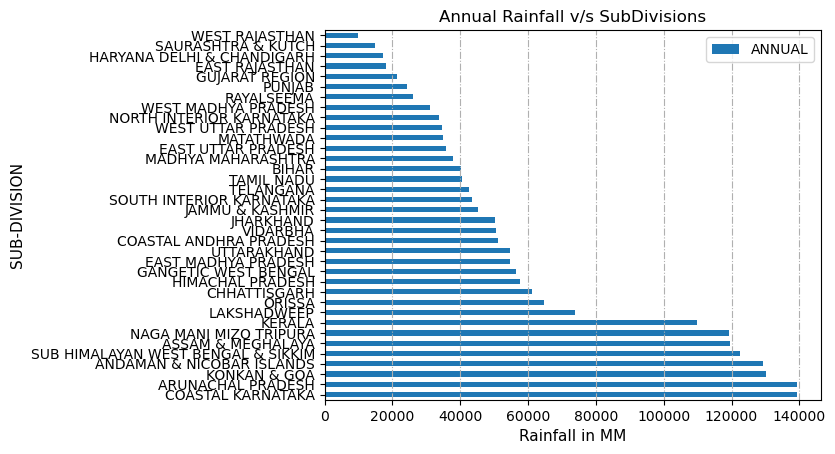

In [26]:
data[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',
 ascending= False).plot(kind='barh')
plt.xlabel('Rainfall in MM',size=11)
plt.ylabel('SUB-DIVISION',size=11)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14208\2413180490.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("YEAR").sum()['ANNUAL'].plot(kind='line',color='r',marker='.')


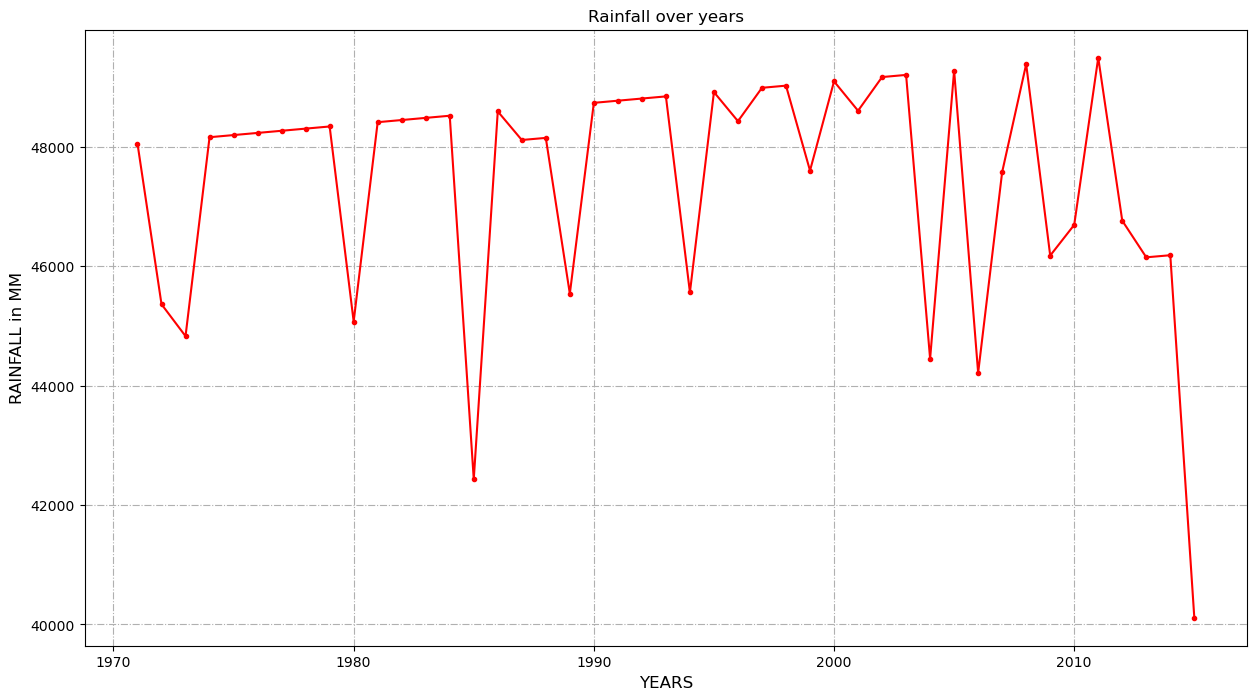

In [27]:
plt.figure(figsize=(15,8))
data.groupby("YEAR").sum()['ANNUAL'].plot(kind='line',color='r',marker='.')
plt.xlabel('YEARS',size=12)
plt.ylabel('RAINFALL in MM',size=12)
plt.grid(axis='both',linestyle='-.')
plt.title('Rainfall over years')
plt.show()

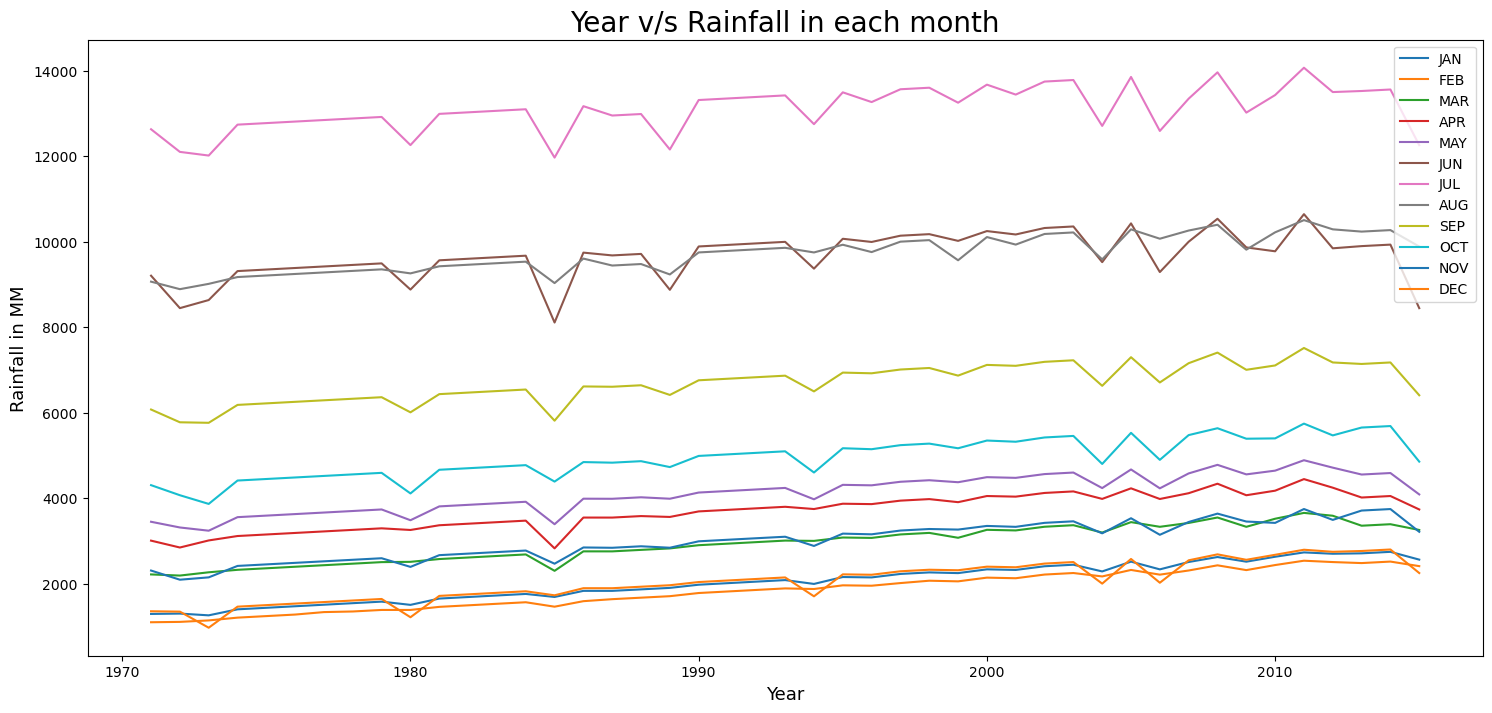

In [28]:
data[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP',
     'OCT','NOV','DEC']].groupby("YEAR").sum().plot(kind='line',figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title('Year v/s Rainfall in each month',size= 20)
plt.show()

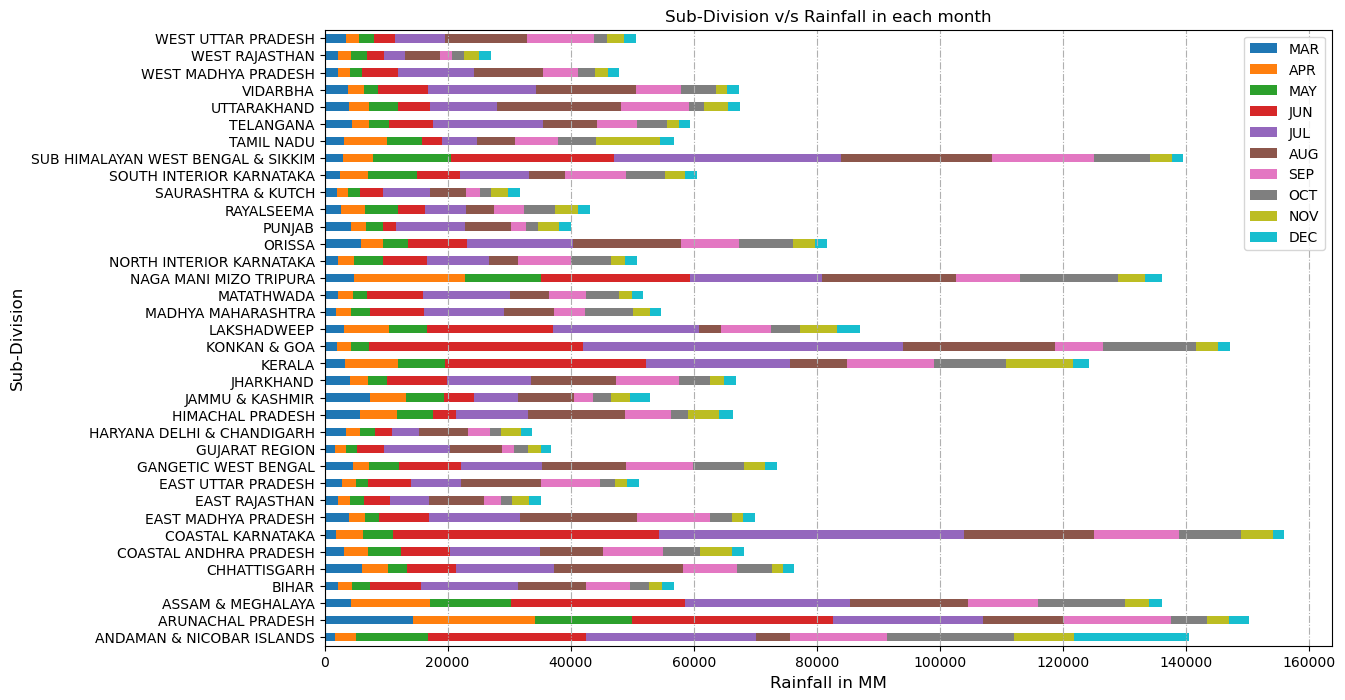

In [29]:
data[['SUBDIVISION','MAR','APR','MAY','JUN','JUL','AUG','SEP',
     'OCT','NOV','DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

# Analysis of Rainfall in Telangana

In [30]:
T=data.loc[((data["SUBDIVISION"]=="TELANGANA"))]
T.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
1257,TELANGANA,1971,20.0,20.0,76.1,40.1,51.1,136.8,376.0,171.7,123.9,84.4,20.7,20.0,920.8
1258,TELANGANA,1972,21.0,21.0,77.1,41.1,52.1,137.8,377.0,172.7,124.9,85.4,21.7,21.0,921.8
1259,TELANGANA,1973,22.0,22.0,78.1,42.1,53.1,138.8,378.0,173.7,125.9,86.4,22.7,22.0,922.8
1260,TELANGANA,1974,23.0,23.0,79.1,43.1,54.1,139.8,379.0,174.7,126.9,87.4,23.7,23.0,923.8
1261,TELANGANA,1975,24.0,24.0,80.1,44.1,55.1,140.8,380.0,175.7,127.9,88.4,24.7,24.0,924.8


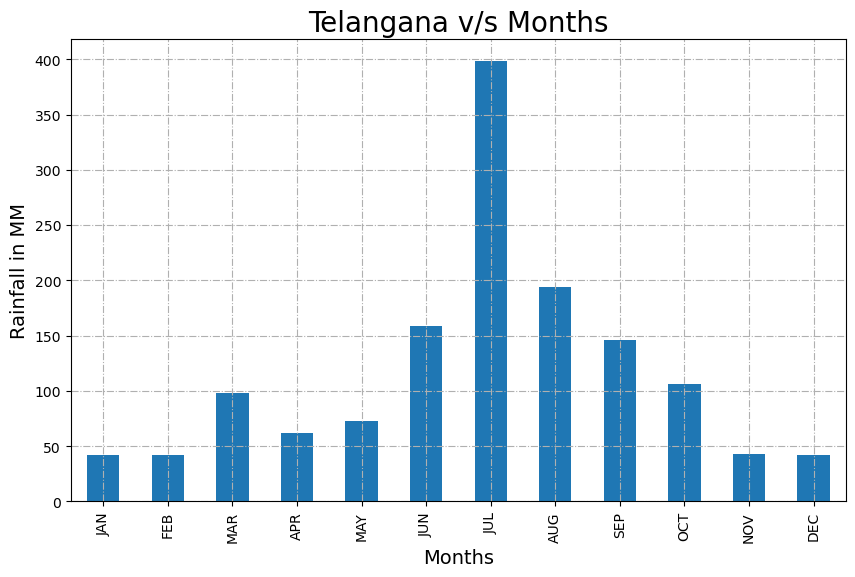

In [31]:
plt.figure(figsize=(10,6))
T[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5)
plt.xlabel("Months",size = 14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.title("Telangana v/s Months",size=20)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_14208\2571210089.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  T.groupby("YEAR").sum()["ANNUAL"].plot(ylim=(50,1500),color="r",marker="o",linestyle="-",linewidth=2,figsize=(12,8))


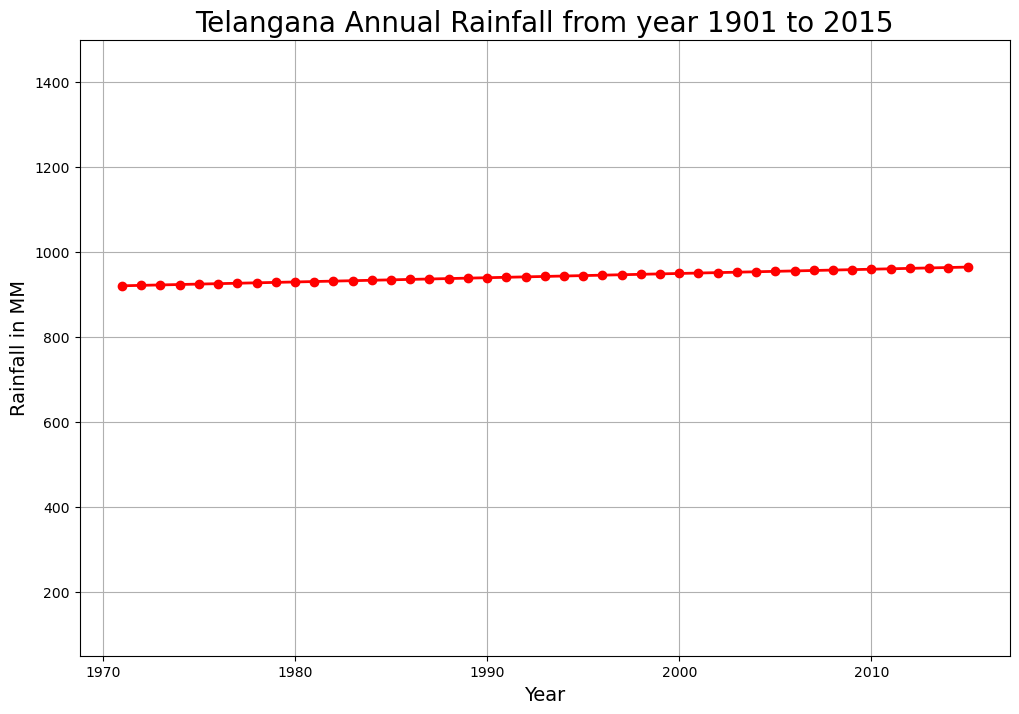

In [32]:
T.groupby("YEAR").sum()["ANNUAL"].plot(ylim=(50,1500),color="r",marker="o",linestyle="-",linewidth=2,figsize=(12,8))
plt.xlabel("Year",size = 14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid()
plt.title("Telangana Annual Rainfall from year 1901 to 2015",size=20)
plt.show()

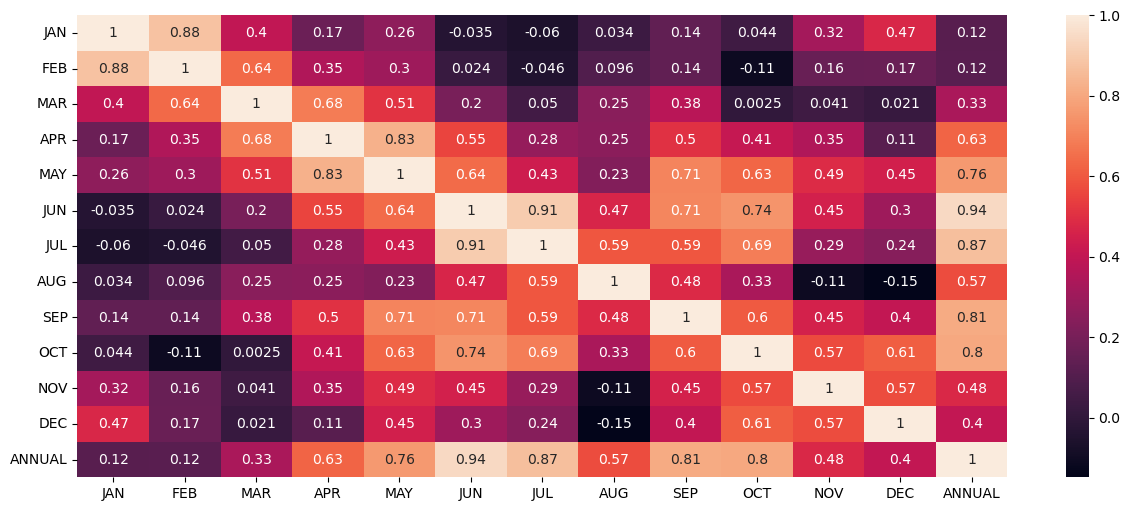

In [33]:
#correlation b/w each numeric attributes
plt.figure(figsize=(15,6))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

<Axes: xlabel='ANNUAL', ylabel='count'>

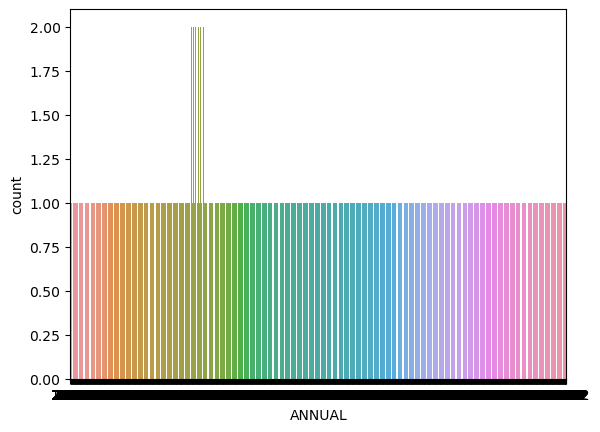

In [34]:
sns.countplot(x=data.ANNUAL)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14208\374752674.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.ANNUAL)


<Axes: ylabel='Density'>

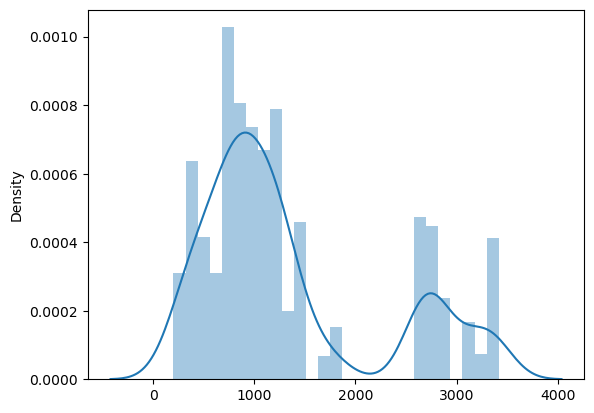

In [35]:
sns.distplot(x=data.ANNUAL)

<Axes: xlabel='ANNUAL'>

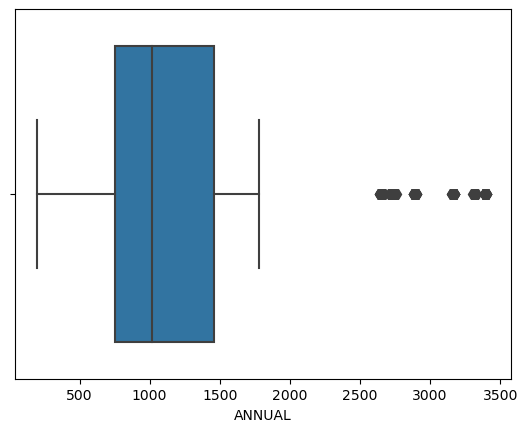

In [36]:
sns.boxplot(x=data.ANNUAL)

<Axes: ylabel='ANNUAL'>

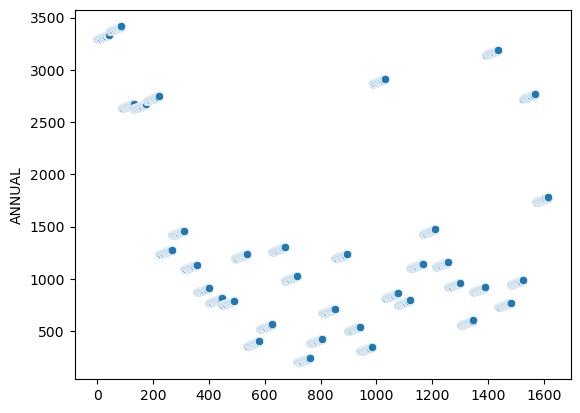

In [37]:
sns.scatterplot(data.ANNUAL)

In [38]:
data["ANNUAL"].isna().sum()

0

In [39]:
data.drop(['SUBDIVISION','YEAR',"FEB","APR"],axis=1,inplace=True)

In [40]:
data.head()

,JAN,MAR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,102.7,20.0,279.0,639.9,685.3,121.3,380.9,509.0,229.6,454.8,3295.1
1,103.7,21.0,280.0,640.9,686.3,122.3,381.9,510.0,230.6,455.8,3296.1
3,105.7,23.0,282.0,642.9,688.3,124.3,383.9,512.0,232.6,457.8,3298.1
4,106.7,24.0,283.0,643.9,689.3,125.3,384.9,513.0,233.6,458.8,3299.1
5,107.7,25.0,284.0,644.9,690.3,126.3,385.9,514.0,234.6,459.8,3300.1


# Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [42]:
x=data.drop(['ANNUAL'],axis=1)
y=data['ANNUAL']

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [45]:
x_scaled[0]

array([ 1.457147  , -1.14767135,  1.89799755,  1.44039285,  1.24640249,
       -1.11873575,  1.96896334,  3.48435403,  2.61964238,  5.79599837])

In [46]:
data.iloc[0]

JAN        102.7
MAR         20.0
MAY        279.0
JUN        639.9
JUL        685.3
AUG        121.3
SEP        380.9
OCT        509.0
NOV        229.6
DEC        454.8
ANNUAL    3295.1
Name: 0, dtype: float64

In [47]:
x.head()

,JAN,MAR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,102.7,20.0,279.0,639.9,685.3,121.3,380.9,509.0,229.6,454.8
1,103.7,21.0,280.0,640.9,686.3,122.3,381.9,510.0,230.6,455.8
3,105.7,23.0,282.0,642.9,688.3,124.3,383.9,512.0,232.6,457.8
4,106.7,24.0,283.0,643.9,689.3,125.3,384.9,513.0,233.6,458.8
5,107.7,25.0,284.0,644.9,690.3,126.3,385.9,514.0,234.6,459.8


In [48]:
y.head()

0    3295.1
1    3296.1
3    3298.1
4    3299.1
5    3300.1
Name: ANNUAL, dtype: float64

# Training and Testing data

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=41)

In [50]:
x_train.head()

,JAN,MAR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
661,166.3,141.4,143.1,92.8,271.3,363.3,178.5,73.3,123.6,65.1
27,129.7,47.0,306.0,666.9,712.3,148.3,407.9,536.0,256.6,481.8
735,38.1,44.4,54.4,58.2,71.6,121.3,38.8,38.2,51.8,38.0
1375,59.7,74.7,131.0,78.8,131.6,142.7,161.4,146.3,235.2,57.6
1423,51.0,51.9,121.7,991.2,1134.4,492.1,319.9,238.1,127.2,51.4


In [51]:
x_train.shape

(1275, 10)

In [52]:
x_test.head()

,JAN,MAR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
642,147.3,122.4,124.1,73.8,252.3,344.3,159.5,54.3,104.6,46.1
588,49.9,79.5,47.5,31.1,233.8,148.2,38.5,27.9,60.5,27.9
213,57.0,78.7,295.8,602.5,834.3,559.7,382.1,214.0,93.3,56.0
554,45.2,70.6,46.1,58.3,93.0,172.4,72.0,37.2,64.4,37.0
1139,41.6,78.9,48.1,173.8,385.8,355.6,160.1,118.5,37.6,37.0


In [53]:
x_test.shape

(319, 10)

In [54]:
y_train.head()

661     1292.5
27      3322.1
735      217.8
1375     903.1
1423    3175.3
Name: ANNUAL, dtype: float64

In [55]:
y_train.shape

(1275,)

In [56]:
y_test.head()

642     1273.5
588      525.5
213     2739.1
554      375.2
1139    1119.3
Name: ANNUAL, dtype: float64

In [57]:
y_test.shape

(319,)

In [58]:
lr=LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
pred=lr.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error,r2_score

In [62]:
lr.coef_

array([-0.37561739,  1.34298781,  1.93474918,  1.48511924,  0.63747623,
        1.12816948,  0.58993421,  0.66625052,  0.74436589,  1.08713685])

In [63]:
lr.intercept_

-257.0491359087241

In [64]:
print(mean_squared_error(y_test,pred))

14795.300623367932


In [65]:
print(r2_score(y_test,pred))

0.9812032903121432


<Axes: xlabel='ANNUAL'>

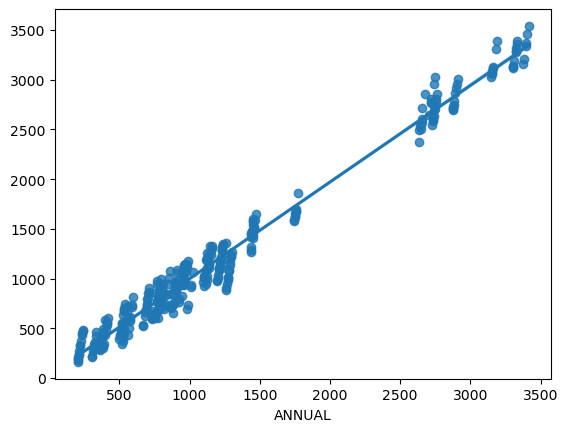

In [66]:
sns.regplot(x=y_test,y=pred)  #regplot method is used to plot data and draw a linear regression model fit.

In [67]:
lr.predict([[250,200,23,30,28,60,30,23,28,8]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([154.79751889])

In [68]:
pred1=lr.predict(x_test)

In [69]:
print(r2_score(y_test,pred1))

0.9812032903121432


# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [71]:
dtree=DecisionTreeRegressor(random_state=42)

In [72]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [73]:
pred1=dtree.predict(x_test)

In [74]:
dtree.score(x_train,y_train)  #training accuracy

1.0

In [75]:
dtree.score(x_test,y_test)  #testing accuracy

0.9999466943702903

In [76]:
print(mean_absolute_error(y_test,pred1))

1.4642633228840112


In [77]:
print(mean_squared_error(y_test,pred1))

41.95802507836996


In [78]:
print(r2_score(y_test,pred1))

0.9999466943702903


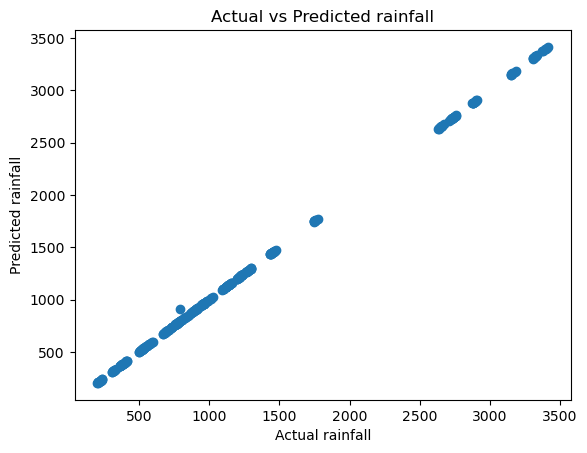

In [79]:
plt.scatter(y_test,pred1)
plt.xlabel("Actual rainfall")
plt.ylabel("Predicted rainfall")
plt.title("Actual vs Predicted rainfall")
plt.show()

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf=RandomForestRegressor()

In [82]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [83]:
pred2=rf.predict(x_test)

In [84]:
print(mean_squared_error(y_test,pred2))

125.34620275235146


In [85]:
print(mean_absolute_error(y_test,pred2))

3.6277742946706604


In [86]:
print(r2_score(y_test,pred2))

0.9998407537471804


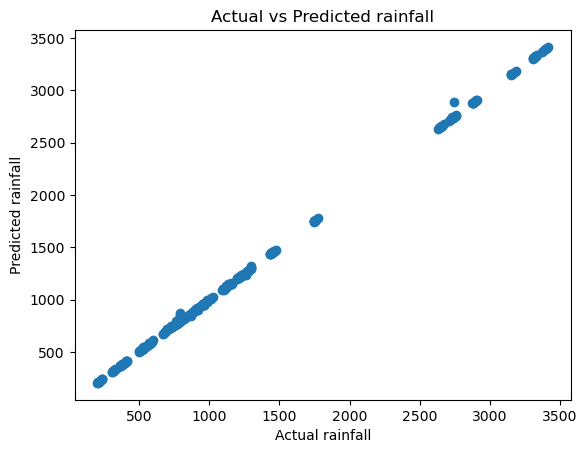

In [87]:
plt.scatter(y_test,pred2)
plt.xlabel("Actual rainfall")
plt.ylabel("Predicted rainfall")
plt.title("Actual vs Predicted rainfall")
plt.show()

# SVM

In [88]:
from sklearn.svm import SVR

In [89]:
svr=SVR(kernel='linear',C=1.0,epsilon=0.2)

In [90]:
svr.fit(x_train,y_train)

SVR(epsilon=0.2, kernel='linear')

In [91]:
pred3=svr.predict(x_test)

In [92]:
print(mean_squared_error(y_test,pred3))

16736.37770885689


In [93]:
print(mean_absolute_error(y_test,pred3))

101.34552787963388


In [94]:
print(r2_score(y_test,pred3))

0.9787372463035435


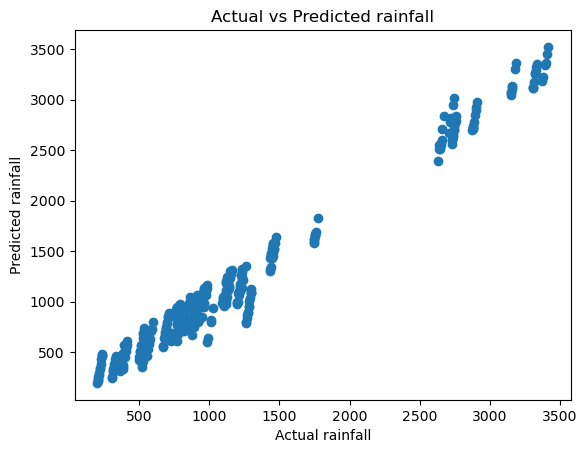

In [95]:
plt.scatter(y_test,pred3)
plt.xlabel("Actual rainfall")
plt.ylabel("Predicted rainfall")
plt.title("Actual vs Predicted rainfall")
plt.show()

# Ada Boost

In [96]:
from sklearn.ensemble import AdaBoostRegressor

In [97]:
ab=AdaBoostRegressor(n_estimators=50,learning_rate=1.0,random_state=42)

In [98]:
ab.fit(x_train,y_train)

AdaBoostRegressor(random_state=42)

In [99]:
pred4=ab.predict(x_test)

In [100]:
print(mean_squared_error(y_test,pred4))

11534.488309420669


In [101]:
print(r2_score(y_test,pred4))

0.9853459937267023


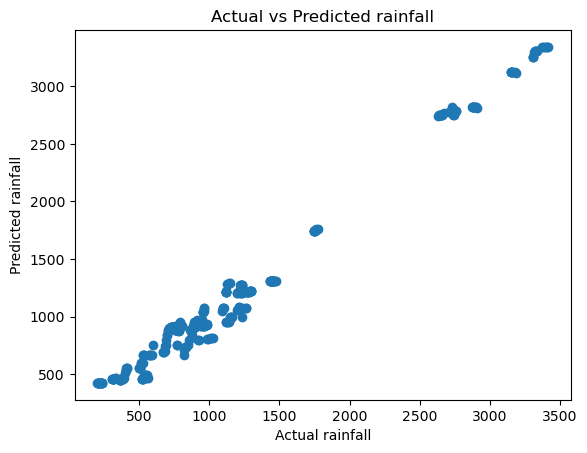

In [102]:
plt.scatter(y_test,pred4)
plt.xlabel("Actual rainfall")
plt.ylabel("Predicted rainfall")
plt.title("Actual vs Predicted rainfall")
plt.show()